# 7 Moving Beyond Linearity

- Standard linear models can have significant limitations in terms of predictive power
- This is because the linearity assumption is almost always an approximation, and somtimes a poor one.
- In previous chapters, techniques such as ridge, lasso, PCA, PSR,... help reduce the complexity of the linear model, and hence the variance of the estimates. 
- In this chapter, we relax the linearity assumption while still attempting to maintain as much interpretability as possible. 

Spoilers: polynomial regreaaion, step functions, splines, local regression, and generalized additive models.

- Polinomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power
- Step functions cut the range of a variable into K distinct regions in order to produce a qualitative variable. This has the effect of fitting a piecewise constant function
- Regresison splines are more flexible than polynomials and step functions, and in fact are an extension of the two. They involve dividing the range of X into K distinct regions, Within each region, a polynomial function is fit to the data. However, these polynomials are constrained so that they join smoothly at the region boundaries, or *knots*. Provided that the interval is divided into enough regions, this can produce an extremely flexible fit.
- Smoothing splines are similar to regression splines, but arise in a slightly different situation. Smmothing splines result from minimizing a residual sum of squares criterion subject to a smoothness penalty
- Local regresison is similar to splines, but differs in animportant way. The regions are allowed to overlap, and indeed they do so in a very smooth way.
- Generalized additive models allow us to extend the methods above to deal with multiple predictors.

These approaches can be seamlessly intergrated in order to model $Y$

## 7.1 Polynomial Regression
Replace 
$$
y_i=\beta_0 + \beta_1x_i+\epsilon
$$
by 
$$
y_1=\beta_0 + \beta_1x_i+\beta_2x_i^2 +...+\beta_d x_i^d + \epsilon
$$

Generally speaking, it is unusual to use d greater than 3 or 4 because for large values of d, the polynomial curve can become overly flexible and can take on some very strange shapes. This is especially true near the boundary of the $X$ variables

How to calculate the estimated variance of $\hat{f}(x_0)$?
The estimated pointwise standard error of $\hat{f}(x_0)$ is the square-root of this variance. This computation is repeated at each reference point $x_0$

## 7.2 Step functions

polynomial functions of the featues as predictors in a linear model imposes a global structure on the non-linear function of $X$. We can instead use *step functions* inorder to avoid imposing such a global structure. 

Here, we break the range of $X$ into *bins*, and fit different constant in each bin. This amounts to converting a continuous variable into an ordered categorical variable.

Process:

First, we construct $K+1$ new variables using $c_1,c_2,...,c_K$ in range of $X$:
$$
C_0(X)=I(X<c_1)\\
C_1(X)=I(c_1\leq X<c_2)\\
.\\
.\\
.\\
C_K(X)=I(X\leq c_K)\\
$$

Notice, $C_0(X)+C_1(X)+...+C_K(X)=1$

We then use OLS to fit a linear model using $C_1(X),C_2(X),...,C_K(X)$ as predictors and normally use $C_0(X)$ as the preference grouop (i.e. the intercept is the mean value of $Y$ for $X<c_1$)

Unfortunately, unless there are natural breakpoints in the predictors, piecewise-constant functions can miss the action.

## 7.3 Basis Functions
Polynomial and piecewise-constant regression models are in fact special cases of a basis function approach. The idea is to have at hand a family of functions or transformations that can be applied to a variable $X$:
$b_1(X),b_2(X),...,b_K(X)$. Instead of fitting a linear model in $X$, we fit the model 
$$
y_1=\beta_0+ \beta_1b_1(x_i)+\beta_2b_2(x_i)+...+\beta_Kb_K(x_i)+\epsilon_i
$$

Note that the basis functions $b_1(.),b_2(.),...,b_K(.)$ are fixed and known.
In other words, we choose the functions ahead of time. Importantly, this means that all of the inference tools for linear models such as standard errors for the coefficients estimates and F-statistics for the model's overall significance, are available in this setting. 

Thus far we have considered the use of polynomial fnctions and piecewise constant functions for our basis functions; however, many alternatives are possibles. For instance, we can use wavelets or Fourier series to construct basis functions. In the next section, we investigate a very common choice for a basis function: *regression splines*.

## 7.4 Regression Splines

- A flexible class of basis functions that extends upon the polynomial regression and piecewise constant regresison approaches that we have just seen.

### 7.4.1 Piecewise Polynomials

In stead of fitting a high-degree polynomial over the entire range of $X$, piecewise polynomial regresison involves fitting separate low-degree polynomials over different regions of $X$. For example, a piecewise cubic polynomail works by fitting a cubic regression model of the form:

$$
y_i=\beta_0+\beta_1x_i+\beta_2x_i^2+\beta_3x_i^3+\epsilon_i,
$$

where the coefficients differ in different parts of the range of $X$. The points where the coefficients change are called *knots*.



More knots leads to a more flexible piecewise polynomial. 

### 7.4.2 Constraints and Splines
Unconstrainted coeeficients lead to $f$ that is not continuous on range($X$). To remedy this problem, we can fit a piecewise polynomial under the constraint that the fitted curve must be continuous. 

We can also add two additional constraints: now both the first and second derivatives of the piecewise polynomials are continuous at the knots. aka (smooth). Each constraint that we impose on the piecewise effectively frees up one degree of freedome, by reducing the complexity of the resulting piecewise polynomial fit. Ingeneral, a cubic spline with K knots uses a total of 4+ K degrees of freedom.

The general definition of a degree=d spline is that is is a piecewise degree-d polynomial, with continuity in derivatives up to degree d-1 at each know. Therefore, a linear spline is obtained by fitting a line in each region of the predictor space defined by the knots, requiring continuity at each know. 

### 7.4.3 The spline Basis Representation
How can we fit a piecewise degree-d polynomial under the constraint that it (and possibly its first d-1 derivatives) be continuous?

We use truncated power basis function:
$$
h(x,\xi) = (x-\xi)^3_+= (x-\xi)^3 \textit{ if } x > \xi \textit{ and } 0 \textit{ otherwise}
$$

More on splines at https://people.computing.clemson.edu/~dhouse/courses/405/notes/splines.pdf

One can show that adding a term of the form $\beta_x h(x,\xi)$ to the model for a cubic polynomial will lead to a discontinuity in only the thrid derivative at $\xi$; In other words, in order to fit a cubic spline to a data set with K knots, we perform OLS with an intercept and 3+K predictors of the form $X,X^2,X^3,h(X,\xi_1),h(X,\xi_2),...,h(X,\xi_K)$ where $\xi_1,...,\xi_K$ are the knots

This amounts to estimating a total of K+4 regression coefficients (including the intercept)

Unfortunately, splines can have high variance at the outer range of the predictors -- that is, when X takes on either a very small or very large value.

A `natural spline` is a regresison spline with additional boundary constraints: the function is required to be linear at the boundary (in the region where $X$ is smaller than the smallest knot, or larger than the largest knot). This additional constraint means that natural splines generally produce more stable estimates at the boundaries. 

Note that a natural spline have narrower CI 

### 7.4.4 Choosing the Number and Locations of the Knots

How should we place the knots?

Idealy, the regresison spline is most flexible in regions that contain a lot of knots, hence, one option is to place more knots in places where we feel the function might vary most rapidly, and to place fewer knots where it seems more stable.

In practice, it is common to place knots in a uniform fashion. One way to do this is to specify the desired degrees of freedom, and then have the software automatically place the corresponding number of knots at uniform quantiles of the data.

How many knots should we use, or equivalently how many degrees of freedom should our spline contain? 

One option is to try out different numbers of knots and see which produces the best looking curve. A somewhat more objective is to use cross-validation

Spoiler: In section 7.7 we fit additive spline models simultaneously on several variables at a time. This could potentially require the selection of degrees of freedom for each variable. In cases like this, we typically adopt a more pragmatic approach and set the degrees of freedom to a fixed number.

### 7.4.5 Comparison to Polynomial Regression

With a same degrees of freedome, regression splines often give superior results to polynomial regresison. 

This is because unlike polynomials, which must use a high degree to produce flexible fits, splines introduce flexibility by increasing the number of knots but keeping the degree fixed. 

Generally, this approach produces more stable estimates.

Splines also allow us to place more knots, and hence flexibility, over regions where the function $f$ seems to be changing rapidly, and fewer knots where $f$ appears more stable



## 7.5 Smoothing SPlines
Last section: specify knots, produce a sequence of basis functions, and then use OLS to estimate the spline coefficients

This section: A different approach that also produces a pline

### 7.5.1 An Overview of Smoothing Splines

The purpose of a smooth curve: fund some function, say $g(x)$ that fits the observed data well: that is $RSS=\sum_{i=1}^n(y_i-g(x_i))^2$ to be small

A problem with this approach: without any constraints on $g(x)$, then we can make RSS zero simply by choosing $g$ such that it *interpolates* all of the $y_i$. Which is woefully overfitting. 

What we really really want is a $g$ that makes RSS small, but that is also *smooth*

How do we ensure *smoothness*? A few ways indeed.

One approach is to find the function that minimizes:

$$
\sum_{i=1}^n(y_i-g(x_i))^2+\lambda \int g''(t)^2 dt
$$

where $\lambda$ is a nonnegative tuning parameter. The function $g$ that minimizes is known as a *smoothing spline*.

Interpretation of $\sum_{i=1}^n(y_i-g(x_i))^2+\lambda \int g''(t)^2 dt$:

- The term $\sum_{i=1}^n(y_i-g(x_i))^2$ is a *loss function* that encourages g to fit the data well
- The tern $\lambda \int g''(t)^2 dt$  is a penalty term that penalized the variability in $g$ and encourage smoothness
    - The first derivative $g'(t)$ measures the slope of a function at t
    - The second derivative $g''(t)$ measures the amount by which the slope is changing aka *roughness*
    - Therefore, $\int g''(t)^2 dt$ is simply a measure of the total change in the function $g'(t)$ over its entire range.

- When $\lambda=0$, the penalty term has no effect, and so the function $g$ will be very jumpy and exactly interpolate the training observations
- When $\lambda \to \infty$, $g$ will be perfectly smooth aka a straight line that passes as closely as possible to the training points (OLS)
- For an intermediate value of $\lambda$, $g$ wiill approximate the training obsevations but will be somewhat smooth. 


<b>We see that $\lambda$ controls the bias-variance trade-off of the smoothing spline</b>


Special properties of $g(x)$ that minimize $\sum_{i=1}^n(y_i-g(x_i))^2+\lambda \int g''(t)^2 dt$:

- It is a piecewise cubic polynomial with knots at the unique values of $x_1,...,x_n$, and continuous first and second deribatives at each knot.
- It is linear in the region outside of the extreme knots. 

<b> However it is not the same natural cubic spline that one would get if one applied the basis function approach, rather, it is a *shrunken* version of such a natural cubic spline, where the value of the tuning parameter $\lambda$ controls the level of shringkage</b>


### 7.5.2 Choosing the Smoothing Parameter $\lambda$

As mentioned, a smoothing spline is simply a natural cubic spline with knots at every unique value of $x_i$, which may have far too many degrees of freedom. But tuning parameter $\lambda$ controls the roughness of the smoothing spline, and hence the effective *degrees of freedom*. As $\lambda$ increase from $0 \to \infty$ , the effective degrees of freedom, which we write $df_\lambda$ decrease from $n$ to 2

In the context of smoothing splines, why do we discuss *effective degrees of freedom instead of degrees of freedom*?

Usually degrees of freedome refer to the number of free parameters, such as number of coefficients fit in a polynomial or cubic spline.

Although a smoothing spline has n parameters and hence n nominal degrees of freedom, these $n$ parameters are heavily constrained or shrunk down. Hen $df_\lambda$ is a measure of the flexibility of the smoothing spline.



Technical part: definition of effective degrees of freedom:

We can write

$$
\boldsymbol{\hat{g}}_\lambda=\boldsymbol{S}_\lambda\boldsymbol{y}
$$

Where $\boldsymbol{\hat{g}}_\lambda$ is the solution for a particular choice of $\lambda$-- that is, it is an n-vector containing the fitted values of the smoothing spline at the training points. $\boldsymbol{S}_\lambda$ is a $n\times n$ matrix (for which there is a formula).

Then the effective degrees of freedom is defined to be 
$$
df_\lambda=\sum_{i=1}^n\{\boldsymbol{S}_\lambda\}_{ii}
$$
the sum of the diagonal elements of the matrix $\boldsymbol{S}_\lambda$

In fitting a smooth spline, we do not need to select the number or location of the knots as there will be a knot at each training observation $x_1,...,x_n$. Instead, we have another problem: we need to choose the value of $\lambda$. It should come as no surprise that one possible solution to this problem is CV.

Turn out: LOOCV can be computed very efficiently for smoothing splines, with essentially the same cost as computing a single fit, using the following formula:

$$
RSS_{cv}(\lambda)=\sum_{i=1}^n(y_i-\hat{g}_\lambda^{(-i)}(x_i))^2=\sum_{i=1}^n[\frac{y_i-\hat{g}_\lambda(x_i)}{1-\{\boldsymbol{S}_\lambda\}_{ii}}]^2
$$

The notation $\hat{g}_\lambda^{(-i)}(x_i)$ indicates the fitted value for this smoothing spline evaluated at $x_i$ where the fit uses all of the training observations except for the ith observation. In contrast $\hat{g}_\lambda(x_i)$ indicates the smoothing spline function fit to all of the training observations and evaluated at $x_i$

## 7.6 Local Regression

*Local regression* is a different approach for fitting flexible non-linear functions, which involves computing the fit at a target point $x_0$ using only the nearby training observations


| Algorithm 7.1 Local Regression At $X=x_0$ |
| --- |
| 1. Gather the fraction $s=\frac{k}{n}$ of training points whose $x_i$ are closet to $x_0$|
|2. Assign a weight $K_{i0}=K(x_i,x_0)$ to each point in this neighborhood, so that the point furthest from $x_0$ has weight zero, and the closet has the highest weight. All by these k nearest neightbors get weight 0|
|3. Fit a weighted OLS of the $y_i$ on the $x_i$ using the aforementioned weights, by finding $\beta_0$ and $\beta_1$ that minimize

$$
\sum_{i=1}^n K_{i0}(y_i-\beta_0-\beta_1x_i)^2
$$|
|4. The fitted value at $x_0$ is given by $\hat{f}(x_0)=\hat{\beta}_0+\hat{\beta}_1x_0$|

Note that $K_{i0}$ will differ for each value of $x_0$. AKA We need to feed a new weighted OLS model for each new point.

Local regression model is sometimes referred to as a *memory-based procedure*, because like nearest-neightbors,we need all the training data each time we wish to compute a prediction.

This is just an introduction, should read a book on the topic

Choices to be made:
- weighting function K
- linear, constant, or quadratic regression in step 3
- span s, which is the proportion of points used to compute the local regresison at $x_0$

The smaller the value of s, the more local and wiggly will be our fit

We can again use CV to choose s


Generalization of local regression 
- In a setting with multiple features $X_1,X_2,...,X_p$ one very useful generalization involves fittings a multiple linear regresison model that is global in some variables, but local in another, such as time.
    - Such varying coefficient models are a useful way of adapting a model to the most recently gathered data.
- Local in a pair of variables, rather than one. We can simply use two-dimensional neighborhoods, and fit bivariate linear regression models using the observations that are near each target point in two-dimensional space.

Theoretically, the same approach can be used for higher dimension but it can perform poorly if p is much larger than about 3 or 4 because there will generally be very few training observations close to $x_0$ -- same as nearest-neighbors regression.

## 7.7 Generalized Additive Models

In previous sections, we present a number of approaches for flexibly predicting a response $Y$ on the basis of a single predictor $X$. These approaches can be seen as extensions of simple linear regresison. Let's extend those to multiple linear regresison

*Generalized additive models* (GAMs) provide a general framework for extending a standard linear model by allowing non-linear functions of each of the variables, while maintaining *additivity*. Just like linear models, GAMs can be applied with both quantitative and qualitative responses. 

### 7.7.1 GAMs for Regression Problems
A natural way to extend the multiple linear regresison model 
$$
y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+...++\beta_px_{ip}+\epsilon_i
$$
in order to allow for non-linear relationships between each feature and the response is to replace each linear component $\beta_jx_{ij}$ with a (smooth) non-linear function $f_j(x_ij)$. We would then write the model as
$$
y_i=\beta_0+\sum_{j=1}^pf_j(x_{ij})+\epsilon_i
$$

It is called an additive model because we calculate a separate $f_j$ for each $X_j$, and then add together all of their contributions.

For splines, you can choose natural splines (regression splines with coundary constraints) or smoothing splines. 
Fiting a GAM with a smoothing spline is not quite simple since least squares can not be used. However, standard software such as `pygam` in Python can be used to fit GAMs using smoothing splineas via `backfitting`

We can also use local regresison, polynomial regression, or any combination of the approaches seen earlier in this chapter to create a GAM

##### Pros and Cons of GAMs

- Pros
    - allow fit non-linear function to each $X_j$. This means that we do not need to manually try out many different transformations on each variable individually.
    - Potentially more accurate predictions
    - Interpretation as we can examine the effect of each $X_j$ on Y individually
    - Smoothness of the function $f_j$ can be summarized via degrees of freedom
- Cons
    - Models are restricted to be additive
    - Thus imporant interactions can be missed
    - However, we can manually add interaction terms to the GAM model by including additional predictors of the form $X_j \times X_k$ or low-dimensional interaction functions of the form $f_{jk}(X_j,X_k)$

For fully general models, we have to look for even more flexible approaches such as random forest and boosting. GAMs provide a useful compromise between linear and fully nonparametric models.

### 7.7.2 GAMs for Classification Problems

Recall the logistic regression model:

$$
log(\frac{p(X)}{1-p(X)})=\beta_0+\beta_1X_1+...+ \beta_pX_p
$$

Extentions:

$$
log(\frac{p(X)}{1-p(X)})=\beta_0+f_1(X_1)+...+ f_p(X_p)
$$

## 7.8 Lab: Non-linear Modeling



In [1]:
# standard import
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots 
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
                         poly ,
                         ModelSpec as MS) 
from statsmodels.stats.anova import anova_lm

In [2]:
# Chapter specific import

from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)
from ISLP.transforms import (BSpline, NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam , 
                        degrees_of_freedom ,
                        plot as plot_gam , 
                        anova as anova_gam)

### 7.8.1 Polynomial Regression and Step Functions


In [3]:
# loading data
Wage = load_data('Wage') 
y = Wage['wage']
age = Wage['age']
 

We will use `poly()` function to create a model matrix that will fit a 4th degree polynomial in age

In [5]:
# specify model and process data
poly_age = MS([poly('age', degree=4)]).fit(Wage) 
# fit model
M = sm.OLS(y, poly_age.transform(Wage)).fit() 
summarize(M)
 

,coef,std err,t,P>|t|
intercept,111.7036,0.729,153.283,0.000
"poly(age, degree=4)[0]",447.0679,39.915,11.201,0.000
"poly(age, degree=4)[1]",-478.3158,39.915,-11.983,0.000
"poly(age, degree=4)[2]",125.5217,39.915,3.145,0.002
"poly(age, degree=4)[3]",-77.9112,39.915,-1.952,0.051


Remarks: `poly()` is a helper function that sets up the transformation while `Poly()` is the actual workhorse that computes the transformation

Now, create a grid of values for `age` at which we want predictions

In [6]:
age_grid=np.linspace(age.min(),
                     age.max(),
                     100)
age_df = pd.DataFrame({'age': age_grid})

Plot the data and add the fit from the fourth-degree polynomial. 

But first, let write a function to create all the ingredients and produce the plot.
Inputs: model specification (`basis` in the function), grid of age
Outputs: a fitted curve as well as 95% confidence bands

In [8]:
def plot_wage_fit(age_df, basis ,title):
    X = basis.transform(Wage)
    Xnew = basis.transform(age_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew) 
    bands = preds.conf_int(alpha=0.05)
    fig, ax = subplots(figsize=(8,8)) 
    ax.scatter(age,
                                                 y,
                                                 facecolor='gray',
                                                 alpha =0.5)
    for val, ls in zip([preds.predicted_mean,
                        bands[:,0],
                        bands[:,1]], 
                       ['b','r--','r--']):
        ax.plot(age_df.values, val, ls, linewidth=3) 
    ax.set_title(title, fontsize=20) 
    ax.set_xlabel('Age', fontsize=20) 
    ax.set_ylabel('Wage', fontsize=20);
    return ax

Now, plot the fit of the fourth-degree polynomial using this function


<AxesSubplot: title={'center': 'Degree-4 Polynomial'}, xlabel='Age', ylabel='Wage'>

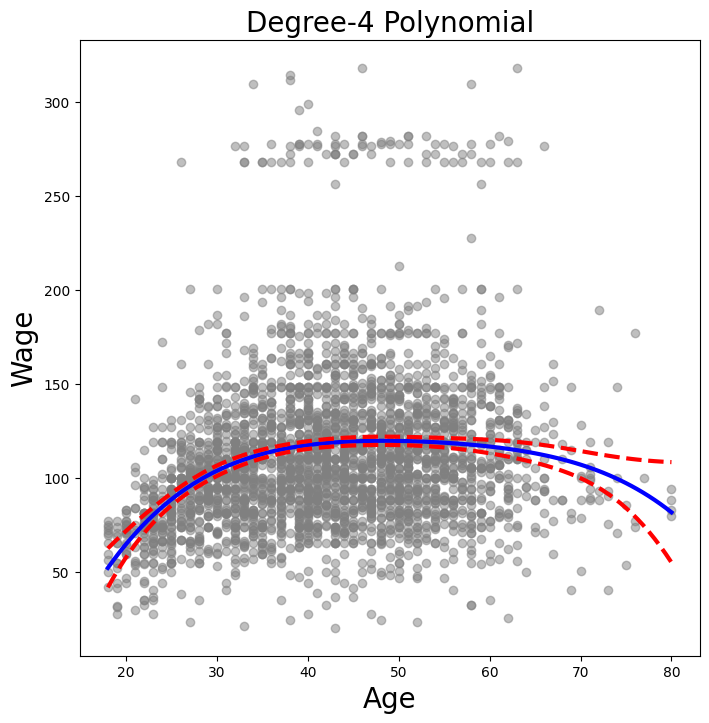

In [9]:
plot_wage_fit(age_df, poly_age ,'Degree-4 Polynomial')
 

A systematic way to determine the degree of polynomial is to use hypothesis testing using `anoval_lm()`



In [10]:
models = [MS([poly('age', degree=d)]) 
          for d in range(1, 6)]
Xs = [model.fit_transform(Wage) for model in models] 
anova_lm(*[sm.OLS(y, X_).fit()
           for X_ in Xs])

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


\* is a prefixed for a list argument required by `anoval_lm()`

Options for picking the degree of polynomial: hypothesis testing, CV

Logistics for Wage>250000

In [11]:
X=   poly_age.transform(Wage)
high_earn = Wage['high_earn'] = y > 250 # shorthand 
glm = sm.GLM(y > 250,
             X,
             family=sm.families.Binomial()) 
B = glm.fit()
summarize(B)

,coef,std err,z,P>|z|
intercept,-4.3012,0.345,-12.457,0.000
"poly(age, degree=4)[0]",71.9642,26.133,2.754,0.006
"poly(age, degree=4)[1]",-85.7729,35.929,-2.387,0.017
"poly(age, degree=4)[2]",34.1626,19.697,1.734,0.083
"poly(age, degree=4)[3]",-47.4008,24.105,-1.966,0.049


Get the prediction

In [12]:

newX = poly_age.transform(age_df) 
preds = B.get_prediction(newX) 
bands = preds.conf_int(alpha=0.05)
 

Plot the estimated relationship


Text(0, 0.5, 'P(Wage > 250)')

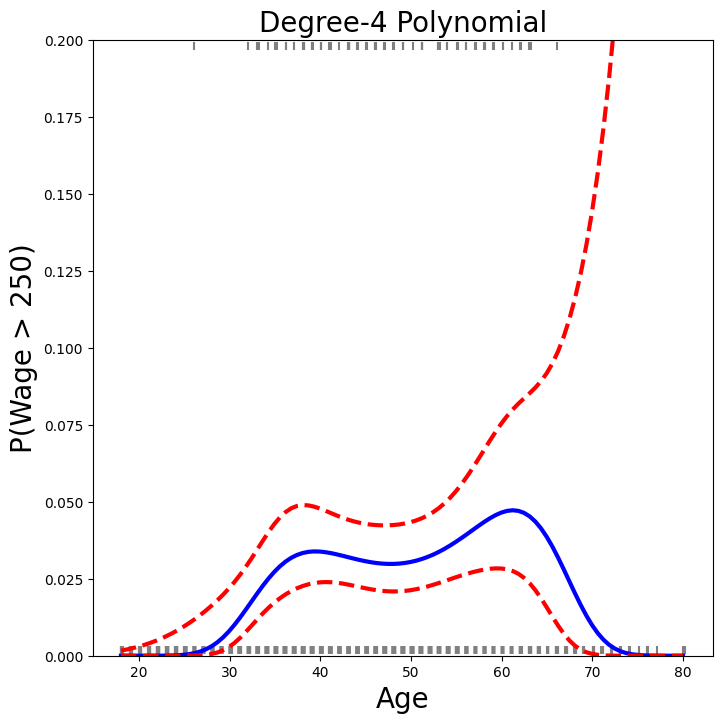

In [14]:
fig, ax = subplots(figsize=(8,8)) 
rng = np.random.default_rng(0) 
ax.scatter(age +
            0.2 * rng.uniform(size=y.shape[0]), 
            np.where(high_earn, 0.198, 0.002), 
            fc='gray',
            marker='|')
for val, ls in zip([preds.predicted_mean, bands[:,0],
                    bands[:,1]],
                   ['b','r--','r--']): 
    ax.plot(age_df.values, val, ls, linewidth=3)
ax.set_title('Degree-4 Polynomial', fontsize=20) 
ax.set_xlabel('Age', fontsize=20) 
ax.set_ylim([0,0.2])
ax.set_ylabel('P(Wage > 250)', fontsize=20)

Using `qcut` and `pd.get_dummies()` to create the step function

In [15]:
cut_age = pd.qcut(age, 4)
summarize(sm.OLS(y, pd.get_dummies(cut_age)).fit())
 

,coef,std err,t,P>|t|
"(17.999, 33.75]",94.1584,1.478,63.692,0.0
"(33.75, 42.0]",116.6608,1.470,79.385,0.0
"(42.0, 51.0]",119.1887,1.416,84.147,0.0
"(51.0, 80.0]",116.5717,1.559,74.751,0.0


### 7.8.2 Splines

For this, we use transforms from `ISPL` package, the actual spline evaluation functions are int he scipy.interpolate package; The author simply wrapped them as transforms similar to `Poly` and `PCA()`

The `BSpline()` function generates cubid splines, to change the degree, use the argument `degree`

In [16]:
bs_ = BSpline(internal_knots=[25,40,60], intercept=True).fit(age) 
bs_age = bs_.transform(age)
bs_age.shape
 

(3000, 7)

This results in a seven-column matrix aka $K+4$

In [21]:
bs_age = MS([bs('age',
                internal_knots=[25,40,60],
                name='bs(age)')]) 
Xbs = bs_age.fit_transform(Wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

,coef,std err,t,P>|t|
intercept,60.4937,9.460,6.394,0.000
bs(age)[0],3.9805,12.538,0.317,0.751
bs(age)[1],44.6310,9.626,4.636,0.000
bs(age)[2],62.8388,10.755,5.843,0.000
bs(age)[3],55.9908,10.706,5.230,0.000
bs(age)[4],50.6881,14.402,3.520,0.000
bs(age)[5],16.6061,19.126,0.868,0.385


Notice that there are 6 spline coefficients rather than 7. This is because, by default, `bs()` assumes `intercept=False`, since we typically have an overall intercept in the model. So it generates the spline basis with the given knots, then discards one of the basis functions to account for the intercept.

We could also use the `df` option to specify the complexity of the spline. 

Note, we can adjust the degree, use `degree = 0`, we will get the result as in our example with `pd.qcut()`

In [22]:
bs_age0 = MS([bs('age', 
                 df=3,
                 degree=0)]).fit(Wage) 
Xbs0 = bs_age0.transform(Wage)
summarize(sm.OLS(y, Xbs0).fit())

,coef,std err,t,P>|t|
intercept,94.1584,1.478,63.687,0.0
"bs(age, df=3, degree=0)[0]",22.3490,2.152,10.388,0.0
"bs(age, df=3, degree=0)[1]",24.8076,2.044,12.137,0.0
"bs(age, df=3, degree=0)[2]",22.7814,2.087,10.917,0.0


Note interpretation: `qcut` uses $\leq$, while `bs()` use $<$

##### Natural spline (regression spline with constraints at the boundary)

In [23]:
ns_age = MS([ns('age', df=5)]).fit(Wage)
M_ns = sm.OLS(y, ns_age.transform(Wage)).fit() 
summarize(M_ns)

,coef,std err,t,P>|t|
intercept,60.4752,4.708,12.844,0.000
"ns(age, df=5)[0]",61.5267,4.709,13.065,0.000
"ns(age, df=5)[1]",55.6912,5.717,9.741,0.000
"ns(age, df=5)[2]",46.8184,4.948,9.463,0.000
"ns(age, df=5)[3]",83.2036,11.918,6.982,0.000
"ns(age, df=5)[4]",6.8770,9.484,0.725,0.468


We use `NaturalSpline()` transform with the corresponding helper `ns()`. Here we fit a natural spline with five degrees of freedom (excluding the intercept) and plot the results

We now plot the natural spline

<AxesSubplot: title={'center': 'Natural spline, df=5'}, xlabel='Age', ylabel='Wage'>

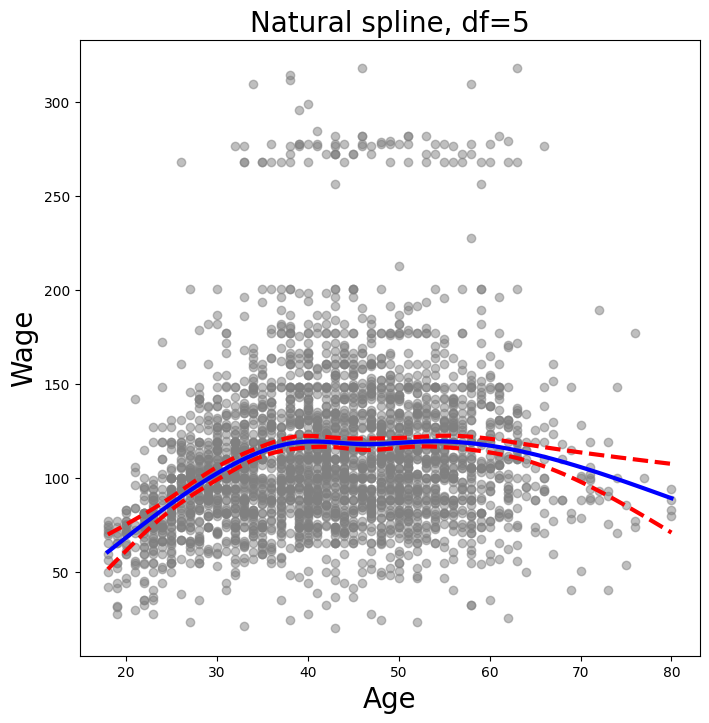

In [24]:
plot_wage_fit(age_df, ns_age ,'Natural spline, df=5')

### 7.8.3 Smoothing Splines and GAMs

A smoothing spline is a special case of a GAM wiht squared-error loss and a single feature.

Options:
- `s` for smoothing spline
- `1` for linear
- `f` fir factir ir categorical


In [25]:
X_age = np.asarray(age).reshape((-1,1)) 
gam = LinearGAM(s_gam(0, lam=0.6)) 
gam.fit(X_age, y)
 

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + intercept, tol=0.0001, 
   verbose=False)

0 above indicates that this smoother will apply to the first column of a feature matrix.

`lam` is $\lambda$ 

`pygam` expect a matrix so we need to reshape `age` to be a matrix instead of a vector. The -1 in `reshape()` tells `numpy` to impute the size of that dimension based on the remaining entries of the shape tuple

Let's investigate how the fit changes with the smoothing parameter `lam`. The function `np.logspace()` is similar to `np.linspace()` but spaces points evenly on the log-scale.

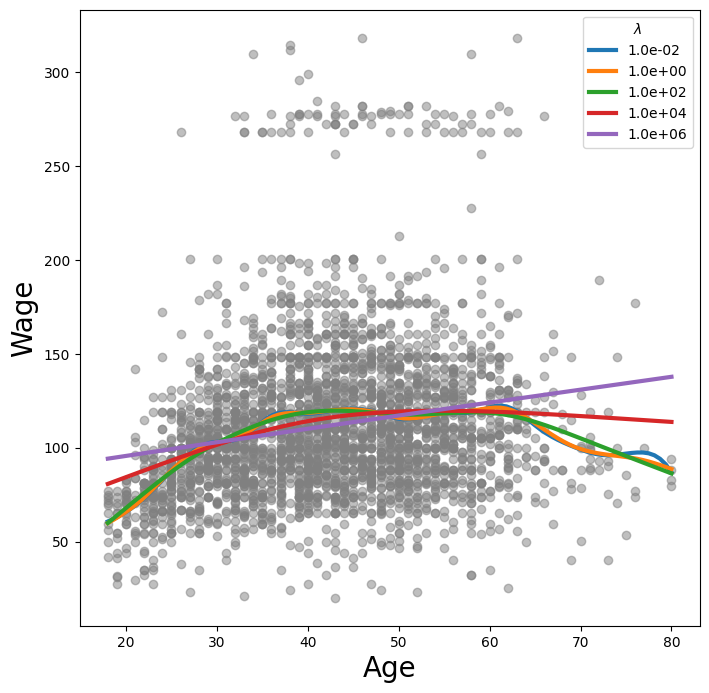

In [27]:
fig, ax = subplots(figsize=(8,8)) 
ax.scatter(age, y, facecolor='gray', alpha=0.5) 
for lam in np.logspace(-2, 6, 5):
    gam = LinearGAM(s_gam(0, lam=lam)).fit(X_age, y) 
    ax.plot(age_grid,
            gam.predict(age_grid), 
            label='{:.1e}'.format(lam), 
            linewidth=3)
ax.set_xlabel('Age', fontsize=20) 
ax.set_ylabel('Wage', fontsize=20)
ax.legend(title='$\lambda$')

The `pygam` package can perform a search for an optimal smoothing parameter.


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


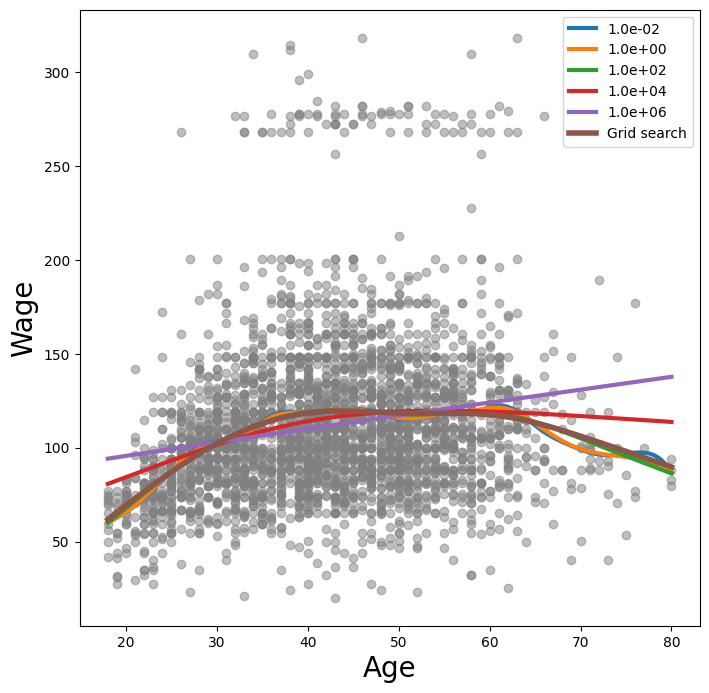

In [28]:
gam_opt = gam.gridsearch(X_age, y)
ax.plot(age_grid,
        gam_opt.predict(age_grid), 
        label='Grid search', 
        linewidth=4)
ax.legend() 
fig

We can also fix the degrees of freedom of the smoothing spline using a function included in the `ISPL.pygam`. Note the the minimum is 2 that includes unpenalized intercept and linear term of the smoothing spline.

In [29]:
age_term = gam.terms[0]
lam_4 = approx_lam(X_age, age_term, 4) 
age_term.lam = lam_4 
degrees_of_freedom(X_age, age_term)

4.000000100000726

Let's vary the degrees of freedom and plot it!


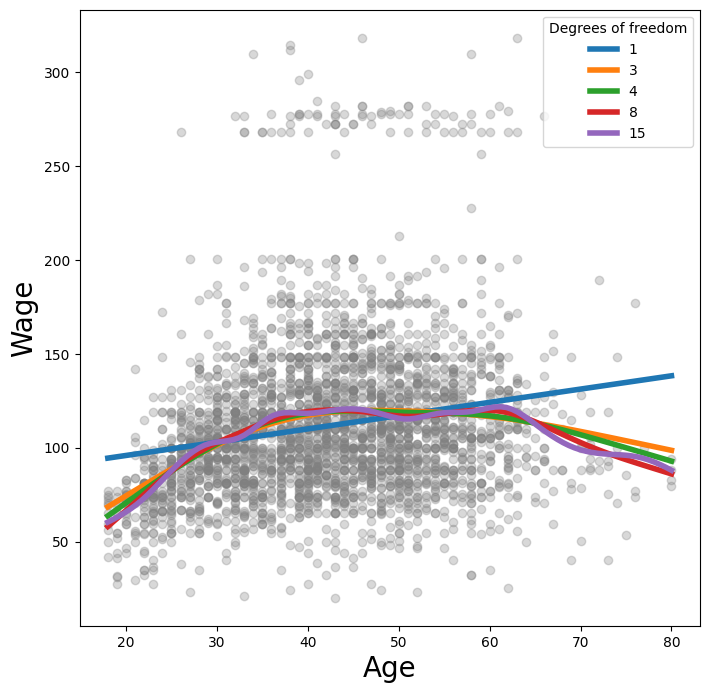

In [30]:
fig, ax = subplots(figsize=(8,8)) 
ax.scatter(X_age,
           y,
           facecolor='gray',
           alpha =0.3) 
for df in [1,3,4,8,15]:
    lam = approx_lam(X_age, age_term, df+1) 
    age_term.lam = lam
    gam.fit(X_age, y)
    ax.plot(age_grid,
            gam.predict(age_grid), 
            label='{:d}'.format(df), 
            linewidth=4)
ax.set_xlabel('Age', fontsize=20) 
ax.set_ylabel('Wage', fontsize=20)
ax.legend(title='Degrees of freedom')
 

### Additive Models with Several Terms

The strength GAMs lies in their ability to fit multivariate regresison models with more flexibility than linear models. 

In this lab, we will use 2 approaches:

1. manual fashion using natural splines and piecewise constant funcitons
2. Using `pygam` package and smoothing splines

Model: predict `wage` using natural spline functions of `year` and `age`, treating `education` as a qualitative predictor.


##### Manual fashion

In [31]:
# fit the transformer for age
ns_age = NaturalSpline(df=4).fit(age)
# fit the transformer for year
ns_year = NaturalSpline(df=5).fit(Wage['year'])
# Create a list of 3 matrixes, 
# each is the matrix of transformed data using previous transformer
Xs = [ns_age.transform(age),
ns_year.transform(Wage['year']),
pd.get_dummies(Wage['education']).values] 
# Stack the elements of the three matrixes to 1 matrix 
# to create a matrix for each observation
X_bh = np.hstack(Xs)
# Use OLS to fit the model
gam_bh = sm.OLS(y, X_bh).fit()

Let's manually construct partial dependence plots for each of the terms in our rudimentary GAM. 

Text(0.5, 1.0, 'Partial dependence of age on wage')

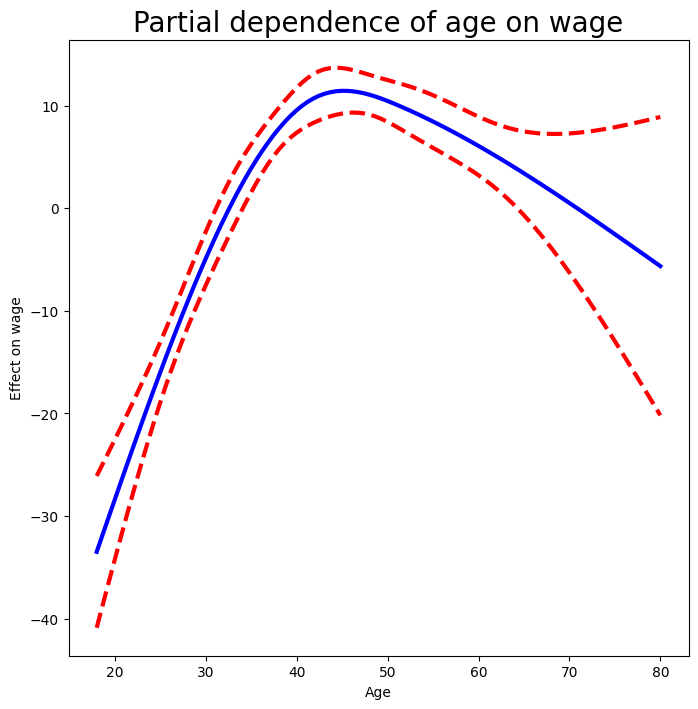

In [48]:
# make an age grid
age_grid = np.linspace(age.min(),
                       age.max(),
                       100) 
# copy the first 100 rows of X_bh
X_age_bh = X_bh.copy()[:100]
# replace the 100-row matrix with the mean values 
# of columns of the original matrix
X_age_bh[:] = X_bh[:].mean(0)[None,:] 
# replace the age in the copy matrix with the basis from 
# spline computed at the age_grid
X_age_bh[:,:4] = ns_age.transform(age_grid) 
# get the prediction for age_grid using the newly created matrix
preds = gam_bh.get_prediction(X_age_bh) 
# calculate the CI
bounds_age = preds.conf_int(alpha=0.05)
# calculate the mean of the prediction
partial_age = preds.predicted_mean 
# calculate the center
center = partial_age.mean() 
# center the predictions
partial_age -= center
bounds_age -= center
# plot the prediction
fig, ax = subplots(figsize=(8,8))
ax.plot(age_grid, 
        partial_age, 
        'b', 
        linewidth=3) 
ax.plot(age_grid,
        bounds_age[:,0], 
        'r--', 
        linewidth=3) 
ax.plot(age_grid,
        bounds_age[:,1],
        'r--',
        linewidth=3)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of age on wage', fontsize=20)

##### Explanation for this huge chunk of code:
The idea: to create a new prediction matrix, where all but the columns belonging to `age` are constant (and set to their training-data means).
The columns for `age` are filled in with the natural spline basis evaluated at the 100 values in `age_grid`

1. We made a grid of length 100 in age, and created a matrix `X_age_bh` with 100 rows and the same number of columns as `X_bh`.
2. We replaced every row of this matrix with the column means of the original.
3. We then replace just the first four columns representing age with the natural spline basis computed at the values in `age_grid`.

Let's also look at the effect of `year` on `wage`; the process is the same

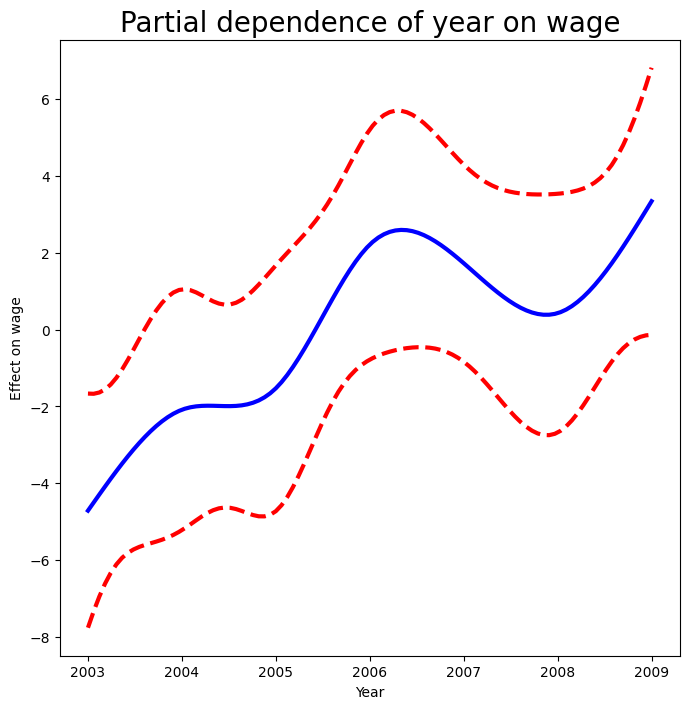

In [69]:
year_grid = np.linspace(2003, 2009, 100) 
year_grid = np.linspace(Wage['year'].min(), Wage['year'].max(),100) 
X_year_bh = X_bh.copy()[:100]
X_year_bh[:] = X_bh[:].mean(0)[None,:] 
X_year_bh[:,4:9] = ns_year.transform(year_grid) 
preds = gam_bh.get_prediction(X_year_bh) 
bounds_year = preds.conf_int(alpha=0.05)
partial_year = preds.predicted_mean 
center = partial_year.mean() 
partial_year -= center
bounds_year -= center
fig, ax = subplots(figsize=(8,8))
ax.plot(year_grid, partial_year, 'b', linewidth=3) 
ax.plot(year_grid, bounds_year[:,0], 'r--', linewidth=3) 
ax.plot(year_grid, bounds_year[:,1], 'r--', linewidth=3) 
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of year on wage', fontsize=20);

##### Let's use `pygam`

In [70]:
gam_full = LinearGAM(s_gam(0) +
                     s_gam(1, n_splines=7) +
                     f_gam(2, lam=0)) 
Xgam = np.column_stack([age,
                        Wage['year'],
                        Wage['education'].cat.codes]) 
gam_full = gam_full.fit(Xgam, y)

The two `s_gam()` terms result in smoothing spline fits, and use a default value for $\lambda$ (`lam=0.6`) which is somewhat arbitrary. For the categorical term `education`, we use `f_gam()`, `lam=0` to avoid any shrinkage

The values for the plot are generated by the `pygam` package. Then use the `plot_gam()` function for partial-dependence plots in `ISPL.pygam`

Text(0.5, 1.0, 'Partial dependence of age on wage - default lam=0.6')

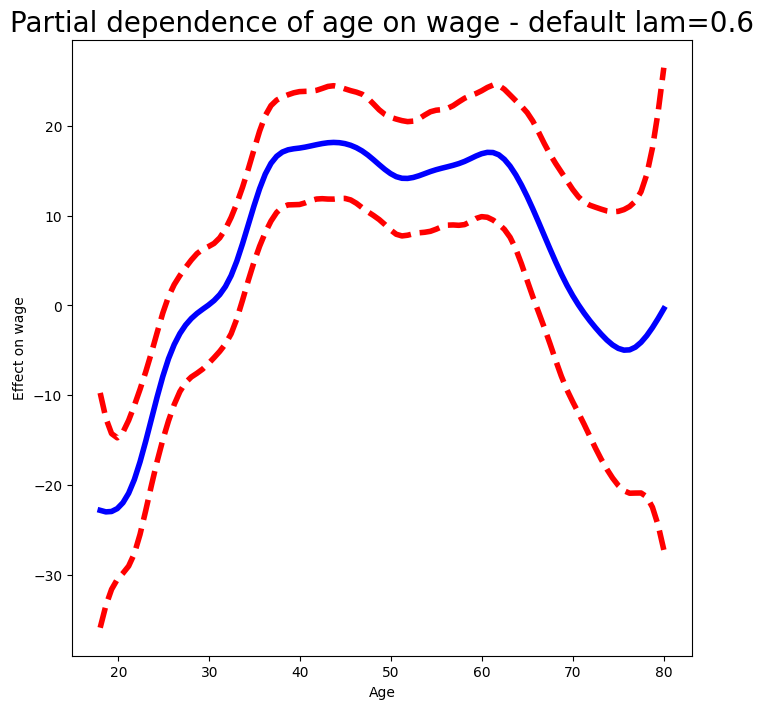

In [71]:
fig, ax = subplots(figsize=(8,8))
plot_gam(gam_full, 0, ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of age on wage - default lam=0.6',
             fontsize=20)

The plot is kinda wiggly. It is more natural to specify the `df` than a value for `lam`. Let's redo it but with `df=4` this time. 


Rmk: (`4+1`) accounts for the intercept of the smoothing spline)

In [72]:
age_term = gam_full.terms[0]
age_term.lam = approx_lam(Xgam, age_term, df=4+1) 
year_term = gam_full.terms[1]
year_term.lam = approx_lam(Xgam, year_term, df=4+1) 
gam_full = gam_full.fit(Xgam, y)

Note that updating `age_term.lam` above updates it in `gam_full.term[0]` as well

Text(0.5, 1.0, 'Partial dependence of year on wage')

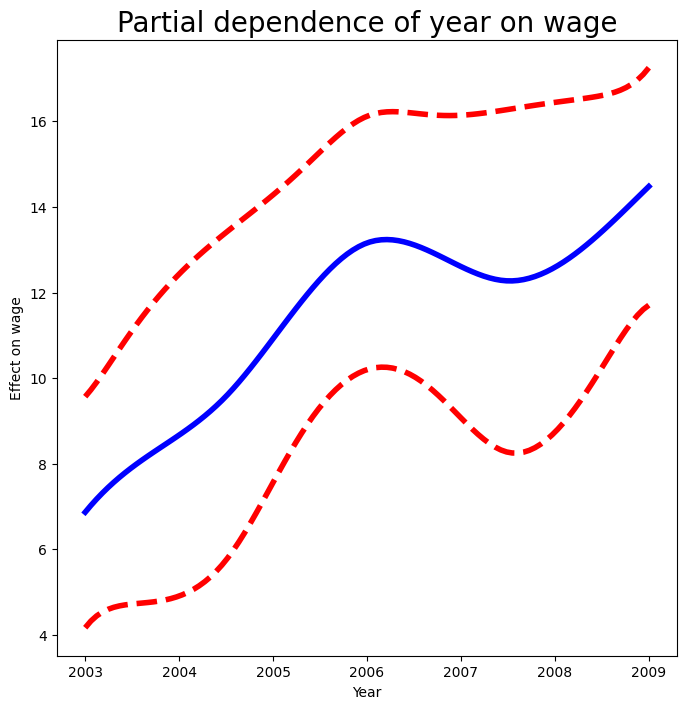

In [73]:
fig, ax = subplots(figsize=(8,8)) 
plot_gam(gam_full,
         1,
         ax=ax) 
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of year on wage', fontsize=20)

Next, let plot `education`

[Text(0, 0, '1. < HS Grad'),
 Text(1, 0, '2. HS Grad'),
 Text(2, 0, '3. Some College'),
 Text(3, 0, '4. College Grad'),
 Text(4, 0, '5. Advanced Degree')]

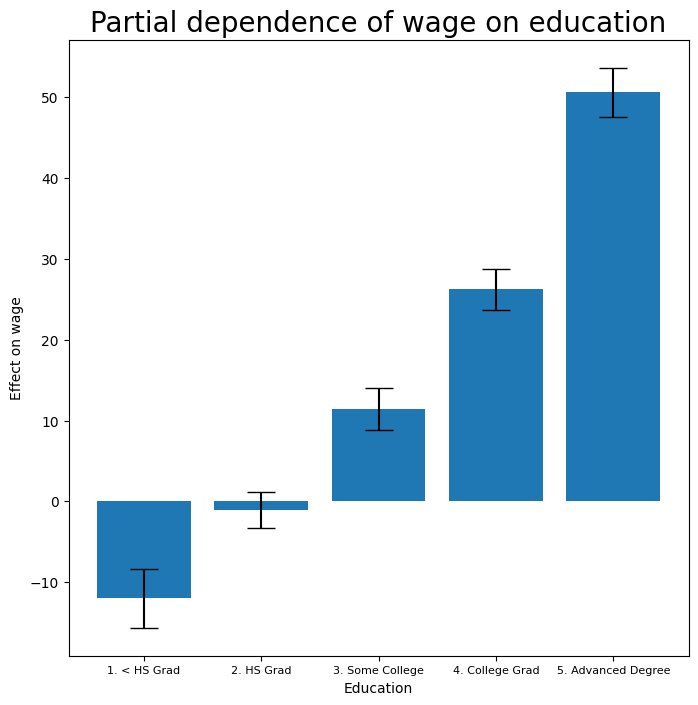

In [74]:
fig, ax = subplots(figsize=(8, 8)) 
ax = plot_gam(gam_full, 2) 
ax.set_xlabel('Education') 
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of wage on education', fontsize =20)
ax.set_xticklabels(Wage['education'].cat.categories, fontsize=8)
 
 

##### ANOVA Tests for Additive Models

In all of our models, the function of year looks rather linear. We can perform a series of ANOVA tests in order to determine which of these three models is best: a GAM that excludes year ($M_1$), a GAM that uses a linear function of year ($M_2$), or a GAM that uses a spline function of year ($M_3$).

In [75]:
gam_0 = LinearGAM(age_term + f_gam(2, lam=0)) 
gam_0.fit(Xgam, y)
gam_linear = LinearGAM(age_term +
                       l_gam(1, lam=0) + 
                       f_gam(1,lam=0))
gam_linear.fit(Xgam, y)


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + l(1) + f(1) + intercept, 
   tol=0.0001, verbose=False)

In [76]:
anova_gam(gam_0, gam_linear, gam_full)

,deviance,df,deviance_diff,df_diff,F,pvalue
0,3.714362e+06,2991.004005,NaN,NaN,NaN,NaN
1,4.742328e+06,2989.002949,-1.027966e+06,2.001057,-415.488924,1.000000e+00
2,3.693143e+06,2987.007254,1.049185e+06,1.995694,425.204980,1.458544e-12


Evidence that a GAM with a linear function in `year` is better than a GAM without `year` but no evidence that a non-linear function of `year` is needed.

Aka: Let's go with $M_2$

Repeat the same process for age, the results suggest a non-linear term for age

In [79]:
gam_0 = LinearGAM(year_term + f_gam(2, lam=0))
gam_0.fit(Xgam,y)
gam_linear = LinearGAM(l_gam(0, lam=0) + year_term +f_gam(2, lam=0))
gam_linear.fit(Xgam,y)
anova_gam(gam_0,gam_linear,gam_full)



,deviance,df,deviance_diff,df_diff,F,pvalue
0,3.975443e+06,2991.000589,NaN,NaN,NaN,NaN
1,3.850247e+06,2990.000704,125196.137317,0.999884,101.270106,1.681120e-07
2,3.693143e+06,2987.007254,157103.978302,2.993450,42.447812,5.669414e-07


We can also make prediction from `gam` object

In [80]:
Yhat=gam_full.predict(Xgam)

For logistic regression GAM, we use `LogisticGAM()` from `pygam`

In [81]:
gam_logit = LogisticGAM(age_term +
                        l_gam(1, lam=0) +
                        f_gam(2, lam=0)) 
gam_logit.fit(Xgam, high_earn)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + l(1) + f(2) + intercept, tol=0.0001, verbose=False)

[Text(0, 0, '1. < HS Grad'),
 Text(1, 0, '2. HS Grad'),
 Text(2, 0, '3. Some College'),
 Text(3, 0, '4. College Grad'),
 Text(4, 0, '5. Advanced Degree')]

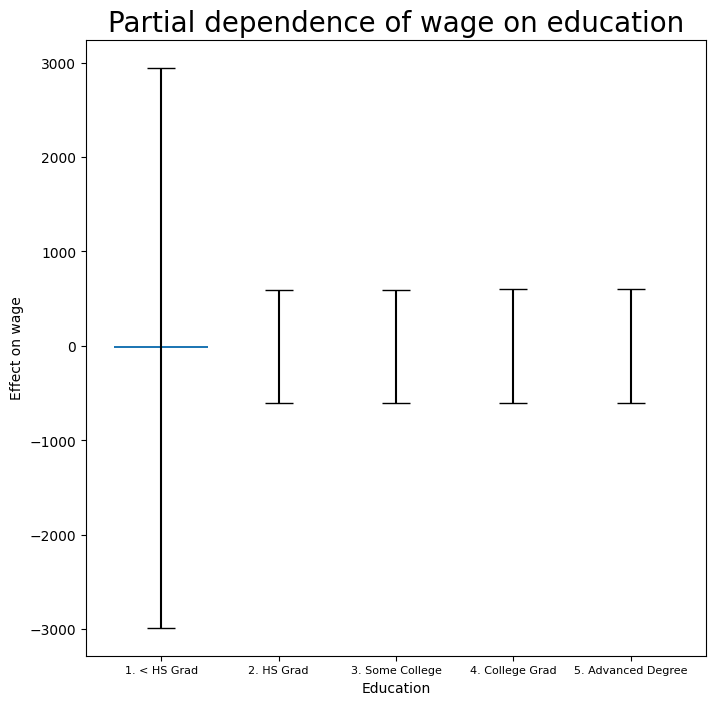

In [82]:
fig, ax = subplots(figsize=(8, 8)) 
ax = plot_gam(gam_logit, 2)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of wage on education',
             fontsize=20)
ax.set_xticklabels(Wage['education'].cat.categories,
                   fontsize=8)

The model seems flat, let's take a closer look at the data

In [83]:
pd.crosstab(Wage['high_earn'], Wage['education'])

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
high_earn,,,,,
False,268,966,643,663,381
True,0,5,7,22,45


No high earner in \<HS Grad

Therefore, we should exclude this category from GAM

In [85]:
only_hs = Wage['education'] == '1. < HS Grad' 
Wage_ = Wage.loc[~only_hs]
Xgam_ = np.column_stack([Wage_['age'],
                         Wage_['year'],
                         Wage_['education'].cat.codes-1]) 
high_earn_ = Wage_['high_earn']

In [86]:
gam_logit_ = LogisticGAM(age_term + 
                         year_term +
                         f_gam(2, lam=0)) 
gam_logit_.fit(Xgam_, high_earn_)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + f(2) + intercept, tol=0.0001, verbose=False)

After removing the category, let's take a look at the plots of the effect of age, education,and year

[Text(0, 0, '2. HS Grad'),
 Text(1, 0, '3. Some College'),
 Text(2, 0, '4. College Grad'),
 Text(3, 0, '5. Advanced Degree')]

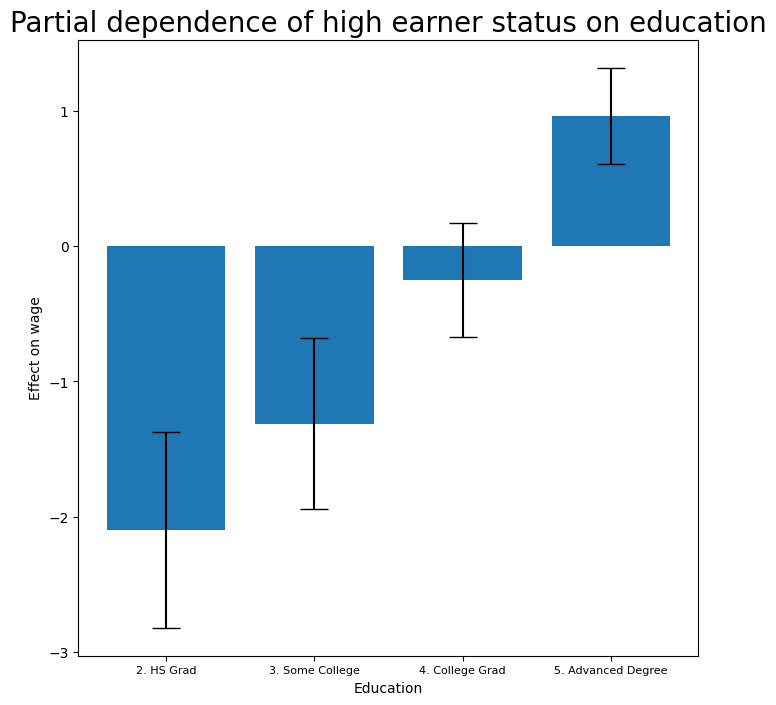

In [87]:
fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 2)
ax.set_xlabel('Education')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on education', fontsize=20); ax.set_xticklabels(Wage['education'].cat.categories[1:],
fontsize=8)

Text(0.5, 1.0, 'Partial dependence of high earner status on year')

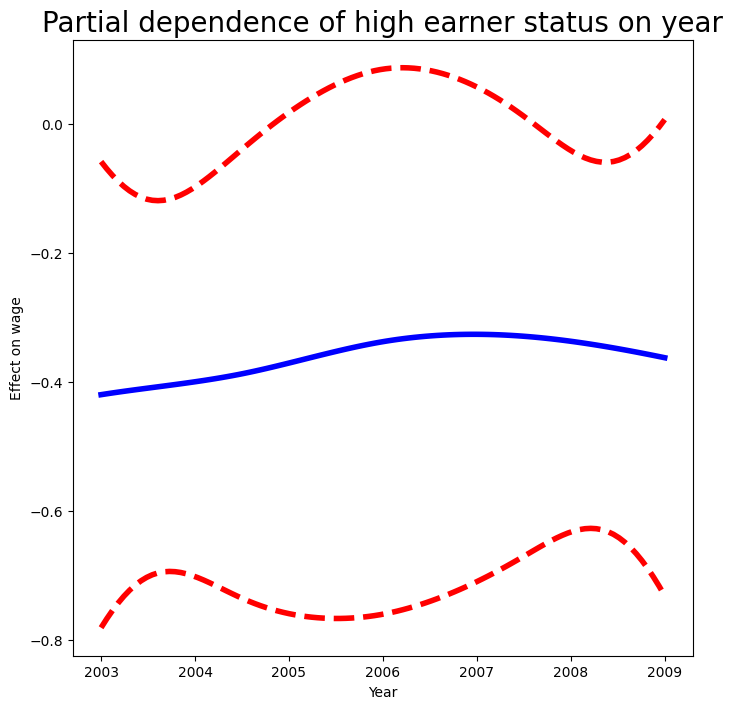

In [88]:
fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 1)
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on year',
fontsize=20)

Text(0.5, 1.0, 'Partial dependence of high earner status on age')

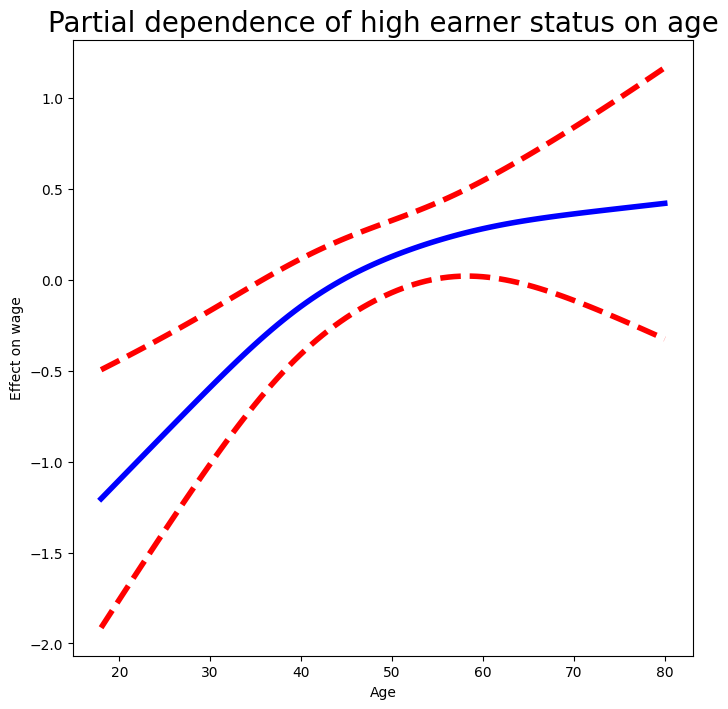

In [89]:
fig, ax = subplots(figsize=(8, 8))
ax = plot_gam(gam_logit_, 0)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of high earner status on age',
fontsize=20)

### 7.8.4 Local Regression

An illustration of local regression using the `lowess()` function from `sm.nonparametric`. Some implementations of GAMs allow terms to be local regression operators; this is NOT the case in `pygam` 

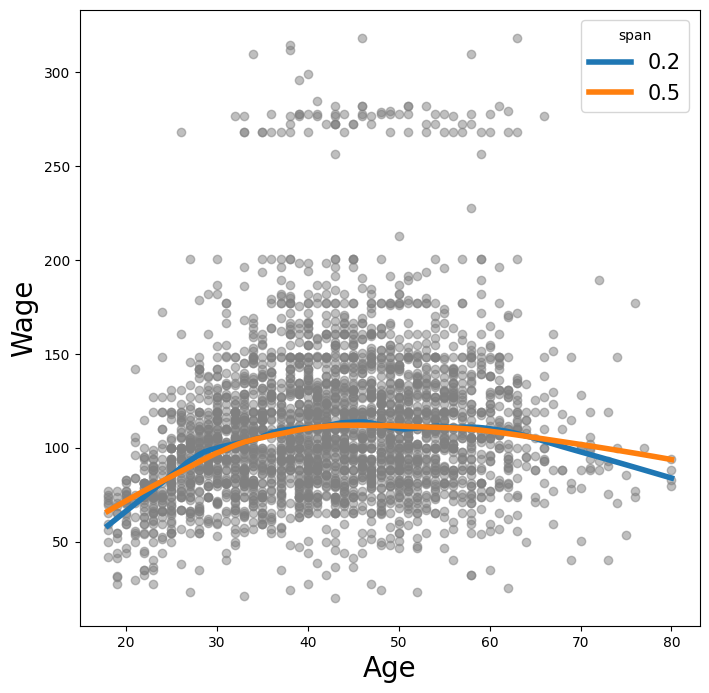

In [90]:
lowess = sm.nonparametric.lowess
fig, ax = subplots(figsize=(8,8)) 
ax.scatter(age, y, facecolor='gray', alpha=0.5) 
for span in [0.2, 0.5]:
    fitted = lowess(y,
                age ,
                frac=span, 
                xvals=age_grid)
    ax.plot(age_grid, 
            fitted ,
            label='{:.1f}'.format(span),
            linewidth=4) 
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Wage', fontsize=20) 
ax.legend(title='span', fontsize=15)

s=0.5 is smoother than s= 0.2